In [1]:
import numpy as np 
import pandas as pd
import sklearn
import tensorflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
df = pd.read_csv('Digit_recog.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
X = df.drop(columns=['label']).values / 255.0 
y = df['label']

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(42000, 784))

In [7]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
model = Sequential([

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam') #loss=SCC does not need OHE

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3199
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1369
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0933
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.0698
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0523
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0421
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - loss: 0.0322
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0265
Epoch 9/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.0231
Epoch 10/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0196


In [13]:
y_pred_prob = model.predict(X_test)
y_pred_prob

329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[5.5710975e-06, 4.8080688e-07, 5.9633043e-05, ..., 9.3587396e-08,
        9.9992931e-01, 2.4812248e-06],
       [1.1953443e-09, 9.9989557e-01, 2.6945834e-08, ..., 4.5530338e-05,
        1.5192047e-07, 2.2302629e-06],
       [2.7218245e-11, 4.6330206e-10, 6.8280055e-13, ..., 8.8089081e-08,
        9.6388995e-09, 9.9999952e-01],
       ...,
       [1.2216356e-13, 1.8589078e-12, 3.9734549e-09, ..., 1.0000000e+00,
        6.2859410e-12, 1.2137230e-09],
       [2.9537294e-16, 3.1188271e-11, 2.8361629e-11, ..., 2.6799254e-10,
        5.2875544e-11, 1.3014791e-09],
       [4.6444084e-14, 5.1015910e-12, 3.3037442e-12, ..., 2.2053221e-09,
        1.2957751e-08, 7.7255756e-08]], shape=(10500, 10), dtype=float32)

In [14]:
y_pred = y_pred_prob.argmax(axis=1)

In [15]:
y_pred

array([8, 1, 9, ..., 7, 4, 4], shape=(10500,))

In [16]:
 X_test = np.array(X_test)
y_test = np.array(y_test)

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Total misclassified: 303 out of 10500


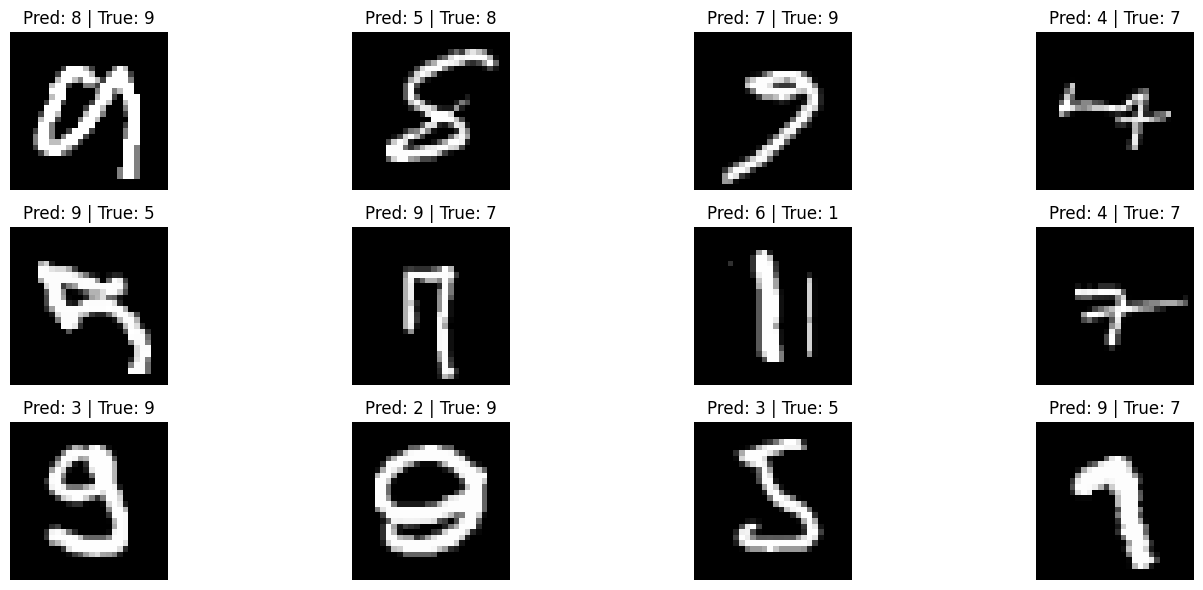

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total misclassified: {len(misclassified_idx)} out of {len(y_test)}")

# Plot some misclassified examples
num_images = 12  # how many misclassified samples to show
plt.figure(figsize=(15, 6))

for i, idx in enumerate(misclassified_idx[:num_images]):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"Pred: {y_pred[idx]} | True: {y_test[idx]}")

plt.tight_layout()
plt.show()


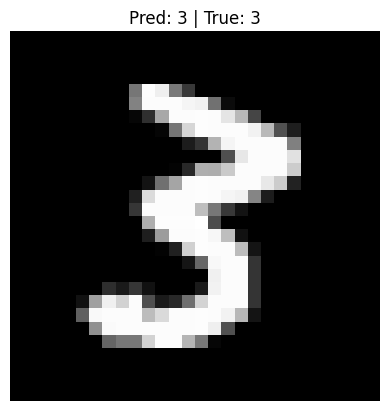

In [20]:
import matplotlib.pyplot as plt

def show_prediction(idx):
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"Pred: {y_pred[idx]} | True: {y_test[idx]}")
    plt.show()

# Example usage:
show_prediction(166) 

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9711428571428572

Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0194 - val_loss: 0.1189
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0127 - val_loss: 0.1422
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0159 - val_loss: 0.1130
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0126 - val_loss: 0.1348
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0112 - val_loss: 0.1210
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0129 - val_loss: 0.1388
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0126 - val_loss: 0.1594
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0106 - val_loss: 0.1395
Epoch 9/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0083 - val_loss: 0.1283
Epoch 10/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0093 - val_loss: 0.1553


KeyError: 'accuracy'

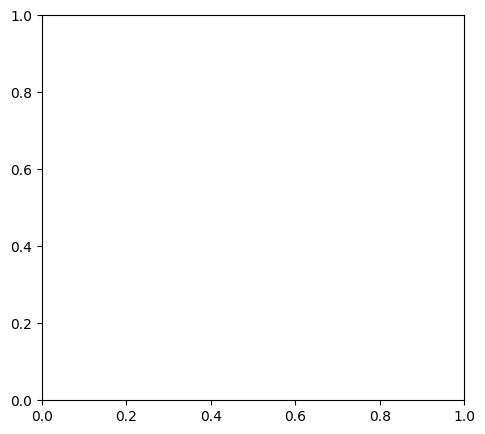

In [23]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training & validation accuracy/loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

plt.show()
